<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Unsupervised Learning (Principal Component Analysis)</h2>
<h4>DAT-5303 | Machine Learning</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Team: Team 6 Steve Badolo/Alejandro Buitrago/Monday Garba/Juan Peña

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
Your team's job in this homework is to conduct principal component analysis on the continuous variables of the Ames, Iowa housing dataset. Use <em>Script 7 - Principal Component Analysis</em> to help guide your coding, and work as a team to interpret the results.

<h3>Step 1</h3>
Import packages, data, and user-defined functions.

In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca


########################################
# loading data and setting display options
########################################
# loading data
from google.colab import files
uploaded = files.upload()

housing = pd.read_excel('Features_part1.xlsx')

Saving Features_part1.xlsx to Features_part1.xlsx


In [2]:
housing = housing.dropna()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this Notebook.

In [3]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2</h3>
Create a Subset of the Continuous X-variables

In [12]:
housing.describe().columns

Index(['Order', 'Lot_Area', 'Overall_Qual', 'Overall_Cond', 'Mas_Vnr_Area',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area',
       'Full_Bath', 'Half_Bath', 'Kitchen_AbvGr', 'TotRms_AbvGr', 'Fireplaces',
       'Garage_Cars', 'Garage_Area', 'Porch_Area', 'Pool_Area', 'Sale_Price',
       'log_Garage_Area', 'log_Sale_Price', 'log_Total_Bsmt_SF',
       'median_First_Flr_SF', 'above the median_First_Flr',
       'below the median_First_Flr', 'above the median_Second_Flr',
       'below the median_Second_Flr', 'cat_Porch_Area',
       'above_the_median_First_Flr', 'below_the_median_First_Flr',
       'above_the_median_Second_Flr', 'below_the_median_Second_Flr',
       'has_Second_Flr', 'has_Garage', 'has_Mas_Vnr', 'has_Porch',
       'Total_Bath'],
      dtype='object')

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2905 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Order                        2905 non-null   int64  
 1   Lot_Area                     2905 non-null   int64  
 2   Street                       2905 non-null   object 
 3   Lot_Config                   2905 non-null   object 
 4   Neighborhood                 2905 non-null   object 
 5   Overall_Qual                 2905 non-null   int64  
 6   Overall_Cond                 2905 non-null   int64  
 7   Mas_Vnr_Area                 2905 non-null   float64
 8   Total_Bsmt_SF                2905 non-null   float64
 9   First_Flr_SF                 2905 non-null   int64  
 10  Second_Flr_SF                2905 non-null   int64  
 11  Gr_Liv_Area                  2905 non-null   int64  
 12  Full_Bath                    2905 non-null   int64  
 13  Half_Bath         

In [18]:
housing.isnull().sum(axis=0)

Order                          0
Lot_Area                       0
Street                         0
Lot_Config                     0
Neighborhood                   0
Overall_Qual                   0
Overall_Cond                   0
Mas_Vnr_Area                   0
Total_Bsmt_SF                  0
First_Flr_SF                   0
Second_Flr_SF                  0
Gr_Liv_Area                    0
Full_Bath                      0
Half_Bath                      0
Kitchen_AbvGr                  0
TotRms_AbvGr                   0
Fireplaces                     0
Garage_Cars                    0
Garage_Area                    0
Porch_Area                     0
Pool_Area                      0
Sale_Price                     0
log_Garage_Area                0
log_Sale_Price                 0
log_Total_Bsmt_SF              0
median_First_Flr_SF            0
above the median_First_Flr     0
below the median_First_Flr     0
above the median_Second_Flr    0
below the median_Second_Flr    0
cat_Porch_

In [20]:
# Subset of the Continuous X-variables

housing_subset = housing[[ 'Lot_Area',  'Mas_Vnr_Area',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area',
         'Garage_Area', 'Porch_Area',
       'median_First_Flr_SF' ]]



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3</h3><br>
Standardize the data using StandardScaler() or the user-defined function (scaler()) presented in class and reattach the feature names from the original dataset.

In [21]:

# scaling (normalizing) variables before correlation analysis
housing_scaled = scaler(df = housing_subset)




<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4</h3><br>
Run principal component analysis (PCA) and present its resulting factor loadings, rounded to two decimal places.

In [22]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
housing_pca = pca.fit_transform(housing_scaled)

# Resulting factor loadings, rounded to two decimal places
pd.DataFrame(housing_pca).round(decimals=2)




,0,1,2,3,4,5,6,7,8
0,1.61,-0.93,2.21,1.01,0.51,0.21,0.71,-0.01,0.0
1,-0.61,-0.66,0.50,-0.53,-0.11,1.81,-0.14,0.01,-0.0
2,0.52,-0.89,1.09,-1.09,0.87,-0.51,-0.18,-0.01,-0.0
3,2.21,-1.93,-0.33,0.72,-1.91,-1.61,-0.11,-0.02,-0.0
4,-0.14,1.08,0.76,-0.05,-0.22,0.19,-0.29,-0.01,0.0
...,...,...,...,...,...,...,...,...,...
2900,-0.89,-0.88,-0.10,-0.10,-0.42,0.89,-0.16,0.00,-0.0
2901,-1.32,-0.74,0.22,-0.25,0.01,0.76,-0.12,0.00,-0.0
2902,-2.06,-0.86,0.64,0.09,0.64,-1.25,-0.18,-0.01,0.0
2903,0.30,-1.07,0.51,-0.75,-0.27,-0.41,-0.15,-0.01,-0.0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 5</h3><br>
Develop a scree plot and determine how many principal components you would like to retain.

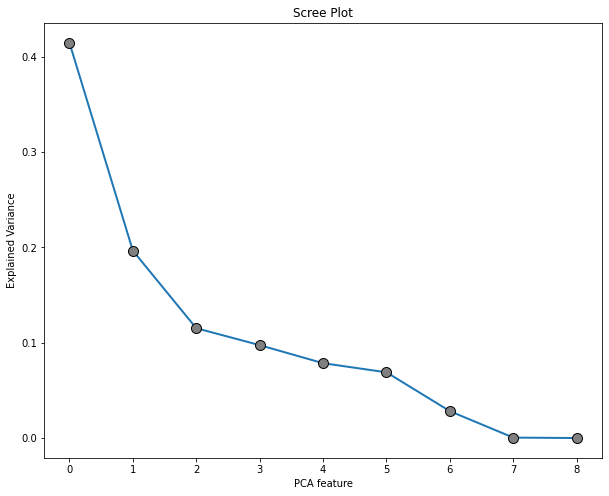

In [24]:
# calling the scree_plot function
scree_plot(pca_object = pca)





In [25]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(housing_scaled.columns)


# checking the result
print(factor_loadings_df)



                        0     1     2     3     4     5     6     7    8
Lot_Area             0.25 -0.04  0.75  0.55  0.22  0.13 -0.07  0.00  0.0
Mas_Vnr_Area         0.33  0.02 -0.49  0.21  0.78  0.05  0.03  0.00  0.0
Total_Bsmt_SF        0.43 -0.34 -0.09 -0.07 -0.17 -0.25 -0.77  0.00  0.0
First_Flr_SF         0.46 -0.33 -0.00 -0.00 -0.18 -0.31  0.54 -0.51  0.0
Second_Flr_SF        0.10  0.77 -0.04  0.10 -0.10 -0.10 -0.23 -0.56  0.0
Gr_Liv_Area          0.44  0.40 -0.03  0.08 -0.23 -0.33  0.23  0.65  0.0
Garage_Area          0.39  0.01 -0.18  0.01 -0.34  0.83  0.03  0.01  0.0
Porch_Area           0.28  0.15  0.39 -0.80  0.32  0.09  0.02 -0.00  0.0
median_First_Flr_SF  0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00  1.0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 6</h3><br>
Run PCA again, limiting the number of components based on the scree plot. Present its resulting factor loadings, rounded to two decimal places.

In [27]:
# naming each principal component
factor_loadings_df.columns = ['Looking_for_space',    
                              'Bigger_living_spaces',       
                              'Looking_for_big_terrains',  
                              'NA',
                              'NA',
                              'NA',
                              'NA',
                              'NA',
                              'NA',] 


# checking the result
factor_loadings_df.round(decimals=2)






,Looking_for_space,Bigger_living_spaces,Looking_for_big_terrains,NA,NA,NA,NA,NA,NA
Lot_Area,0.25,-0.04,0.75,0.55,0.22,0.13,-0.07,0.00,0.0
Mas_Vnr_Area,0.33,0.02,-0.49,0.21,0.78,0.05,0.03,0.00,0.0
Total_Bsmt_SF,0.43,-0.34,-0.09,-0.07,-0.17,-0.25,-0.77,0.00,0.0
First_Flr_SF,0.46,-0.33,-0.00,-0.00,-0.18,-0.31,0.54,-0.51,0.0
Second_Flr_SF,0.10,0.77,-0.04,0.10,-0.10,-0.10,-0.23,-0.56,0.0
Gr_Liv_Area,0.44,0.40,-0.03,0.08,-0.23,-0.33,0.23,0.65,0.0
Garage_Area,0.39,0.01,-0.18,0.01,-0.34,0.83,0.03,0.01,0.0
Porch_Area,0.28,0.15,0.39,-0.80,0.32,0.09,0.02,-0.00,0.0
median_First_Flr_SF,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,1.0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 7</h3><br>
Write an interpretation of the results (5-7 sentences per retained principal component).

In [ ]:
# Looking_for_space:
 
#  The data indicates that the first set of customers are positively correlated
#  to space availability. They are attracted to Total Basement Square Footage,
#   First Floor Square Footage and Ground Living Area. 
#   These areas of the house are traditionally large areas. 
#   The variance of 0.43, 0.46 and 0.44 respectively for total basement area, first floor and ground living areas indicate an attraction for large space.
#   Interestingly there is no negative correlation regarding large space.

# Bigger_living_spaces: 

# Big living spaces has shown to be another attractive portion of the house to customers.
# The second floor and the ground living area show a positive correlated variance of 0.77 and 0.44 respectively.
# Negative correlation for this set of customers is negligible.
# Traditionally houses are built with living areas as they provide comfort for owners.
# Hence, it can be concluded that bigger living spaces play a key role in customer´s decision making process.

# Looking for big terrains:

# The third category of customers are attracted to bigger terrains.
# This can be shown by the positively correlated variance of 0.75 for the lot area.
# Paradoxical, the data shows a negative correlation within this category of customers.
# This behavior indicates less attraction to mass venere area as shown with the variance -0.49.
# Hence, it can be concluded that having the large lot area attracts customers.

